# <center> Wine Quality Analysis </center>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix as CM

## Data Collection

In [2]:

wine_dataset = pd.read_csv('Red Wine data.csv')

In [3]:

wine_dataset.shape

(1599, 12)

In [4]:

wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [5]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [6]:

wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [7]:
for col in wine_dataset.columns:
  if wine_dataset[col].isnull().sum() > 0:
    wine_dataset[col] = wine_dataset[col].fillna(wine_dataset[col].mean())
 
wine_dataset.isnull().sum().sum()

0

## Data Analysis and Visulaization

In [8]:

wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.865961,0.001887,0.080321,0.169507,1.065668,0.807413
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


### Histogram

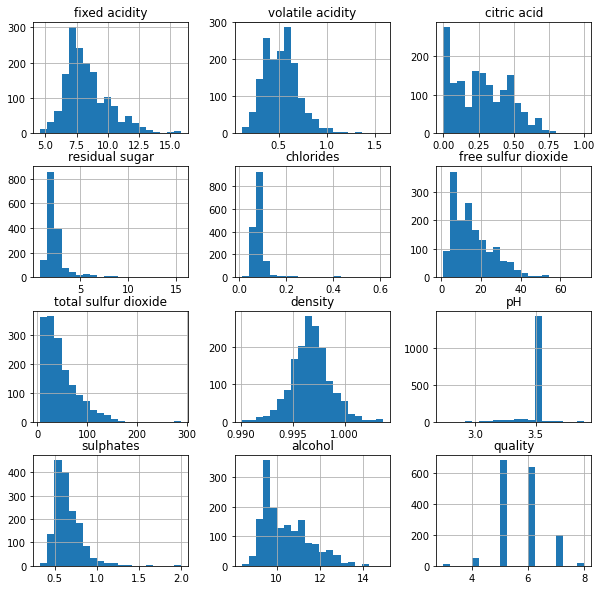

In [9]:
wine_dataset.hist(bins=20, figsize=(10, 10))
plt.show()

### Barplot

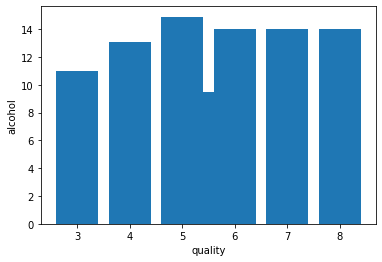

In [10]:
plt.bar(wine_dataset['quality'], wine_dataset['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

### Boxplot

Checking for Outliers

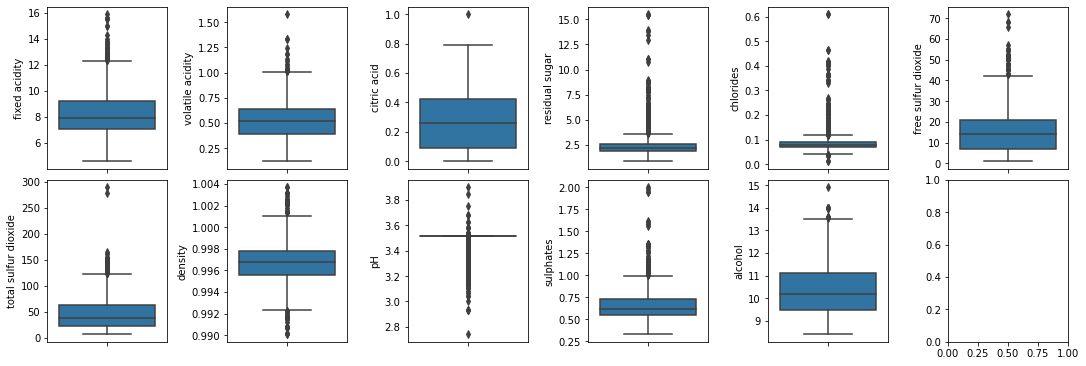

In [11]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in wine_dataset.columns:
  if i != 'quality':
    sns.boxplot(y=i, data=wine_dataset, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show()

## Feature Extracion

<function matplotlib.pyplot.show(close=None, block=None)>

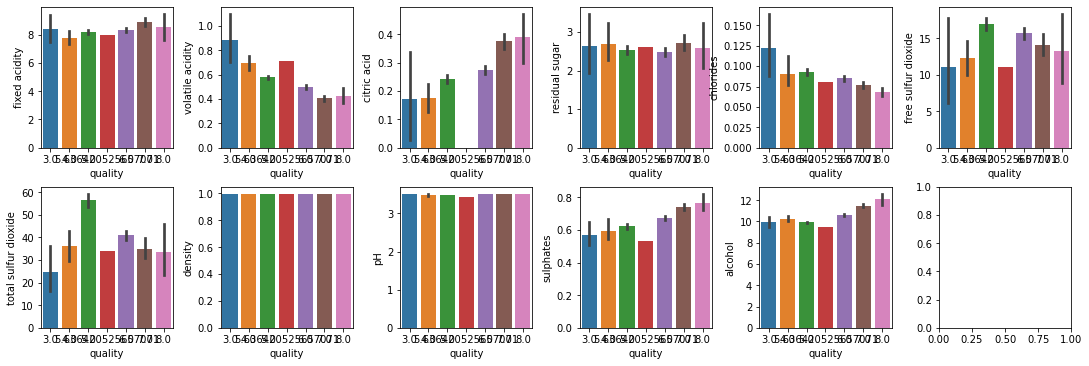

In [12]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index=0
for i in wine_dataset.columns:
  if i != 'quality':
    sns.barplot(x='quality', y=i, data=wine_dataset, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show

## Correlation

In [13]:
correlation = wine_dataset.corr()

<AxesSubplot:>

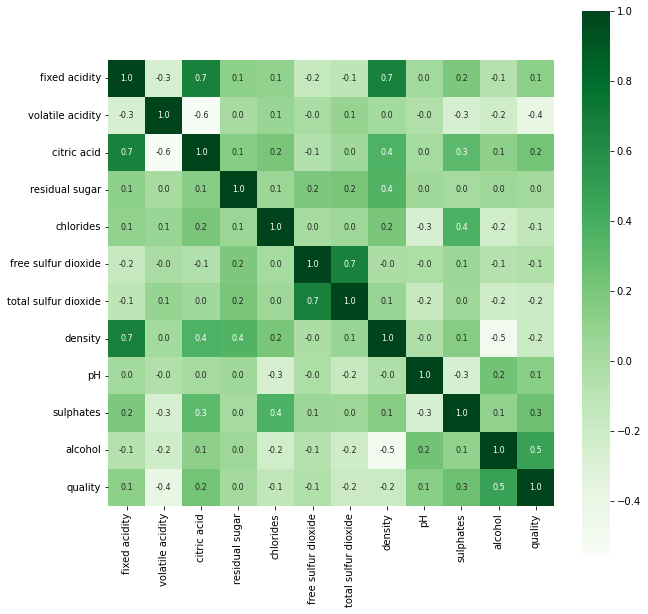

In [14]:

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Greens')

## Data Preprocessing

In [15]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine_dataset['quality'] = pd.cut(wine_dataset['quality'], bins = bins, labels = group_names)
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [16]:
wine_dataset['quality'] = wine_dataset['quality'].map({'bad' : 0, 'good' : 1})
wine_dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.000000,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.000000,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.000000,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.000000,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.000000,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.000000,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.000000,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.000000,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.000000,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,46.433041,0.9978,3.35,0.80,10.5,0


0    1382
1     217
Name: quality, dtype: int64

Visualisation of accuracies of differnt classification models


C:\Users\SAI BHARGHAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


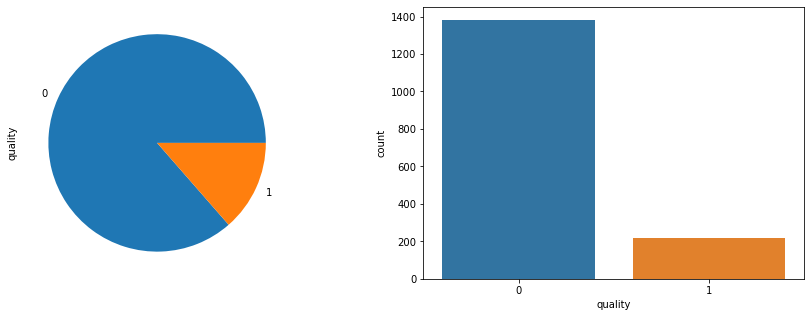

In [17]:
print(wine_dataset['quality'].value_counts())
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
ax = ax.flatten()
print('\nVisualisation of accuracies of differnt classification models')
wine_dataset['quality'].value_counts().plot(x=0, y=1, kind='pie', figsize=(15,5), ax=ax[0])
sns.countplot(wine_dataset['quality'], ax=ax[1])
plt.show()

 We have divided the quality of wine in two buckets

## Model development

In [18]:
X = wine_dataset.iloc[:, :-1]
Y = (wine_dataset.iloc[:, 11])

In [19]:
xtrain, xtest, ytrain, ytest = tts(X, Y, test_size=0.20, random_state=0)

In [20]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression(solver='lbfgs', random_state=0)
logisticRegression.fit(xtrain,ytrain)
Y_pred_logisticRegression = logisticRegression.predict(xtest)
Y_compare_logisticRegression = pd.DataFrame({'Actual' : ytest, 'Predicted' : Y_pred_logisticRegression})
print(Y_compare_logisticRegression.head())
print('\nConfussion matrix:')
print(CM(ytest, Y_pred_logisticRegression))

     Actual  Predicted
1109      0          0
1032      0          0
1002      1          0
487       0          0
979       0          0

Confussion matrix:
[[282   8]
 [ 23   7]]


### Naive Bayes Classification

In [22]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(xtrain, ytrain)
Y_pred_nb = nb.predict(xtest)
Y_compare_nb = pd.DataFrame({'Actual' : ytest, 'Predicted' : Y_pred_nb})
print(Y_compare_nb.head())
print('Training Accuracy : ', metrics.roc_auc_score(ytrain, nb.predict(xtrain)))
print('Validation Accuracy : ', metrics.roc_auc_score(ytest, nb.predict(xtest)))
print()

     Actual  Predicted
1109      0          0
1032      0          0
1002      1          1
487       0          0
979       0          1
Training Accuracy :  0.7798622945681769
Validation Accuracy :  0.8126436781609194



### Support Vector Classification

In [23]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', gamma='scale', random_state=0)
svc.fit(xtrain, ytrain)
Y_pred_svc = svc.predict(xtest)
Y_compare_svc = pd.DataFrame({'Actual' : ytest, 'Predicted' : Y_pred_svc})
print(Y_compare_svc.head())
print('Training Accuracy : ', metrics.roc_auc_score(ytrain, svc.predict(xtrain)))
print('Validation Accuracy : ', metrics.roc_auc_score(ytest, svc.predict(xtest)))
print()

     Actual  Predicted
1109      0          0
1032      0          0
1002      1          1
487       0          0
979       0          0
Training Accuracy :  0.6366011439540852
Validation Accuracy :  0.6448275862068965



### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc = RFC(n_estimators=25, criterion='gini', random_state=0,)
rfc.fit(xtrain, ytrain)
Y_pred_rfc = rfc.predict(xtest)
Y_compare_rfc = pd.DataFrame({'Actual' : ytest, 'Predicted' : Y_pred_rfc})
print(Y_compare_rfc.head())
print('Training Accuracy : ', metrics.roc_auc_score(ytrain, rfc.predict(xtrain)))
print('Validation Accuracy : ', metrics.roc_auc_score(ytest, rfc.predict(xtest)))
print()

     Actual  Predicted
1109      0          0
1032      0          0
1002      1          1
487       0          0
979       0          0
Training Accuracy :  0.9919786096256684
Validation Accuracy :  0.7293103448275863



### K-Nearest Neighbour Classification

In [25]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN(n_neighbors=2, metric='minkowski', p=2,)
knn.fit(xtrain, ytrain)
Y_pred_knn = knn.predict(xtest)
Y_compare_knn = pd.DataFrame({'Actual' : ytest, 'Predicted' : Y_pred_knn})
print(Y_compare_knn.head())
print('Training Accuracy : ', metrics.roc_auc_score(ytrain, knn.predict(xtrain)))
print('Validation Accuracy : ', metrics.roc_auc_score(ytest, knn.predict(xtest)))
print()

     Actual  Predicted
1109      0          0
1032      0          0
1002      1          1
487       0          0
979       0          0
Training Accuracy :  0.8021390374331551
Validation Accuracy :  0.7396551724137931



## Model evaluation

In [26]:
from sklearn.model_selection import cross_val_score

modelNames = ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector', 'Naive Bayes', 'Random Forrest']
modelClassifiers = [logisticRegression, knn, svc, nb, rfc]
models = pd.DataFrame({'modelNames' : modelNames, 'modelClassifiers' : modelClassifiers})
counter=0
score=[]
for i in models['modelClassifiers']:
  accuracy = cross_val_score(i, xtrain, ytrain, scoring='accuracy', cv=10)
  print('Accuracy of %s Classification model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
  score.append(accuracy.mean())
  counter+=1

Accuracy of Logistic Regression Classification model is 0.87
Accuracy of K-Nearest Neighbour Classification model is 0.86
Accuracy of Support Vector Classification model is 0.87
Accuracy of Naive Bayes Classification model is 0.79
Accuracy of Random Forrest Classification model is 0.90


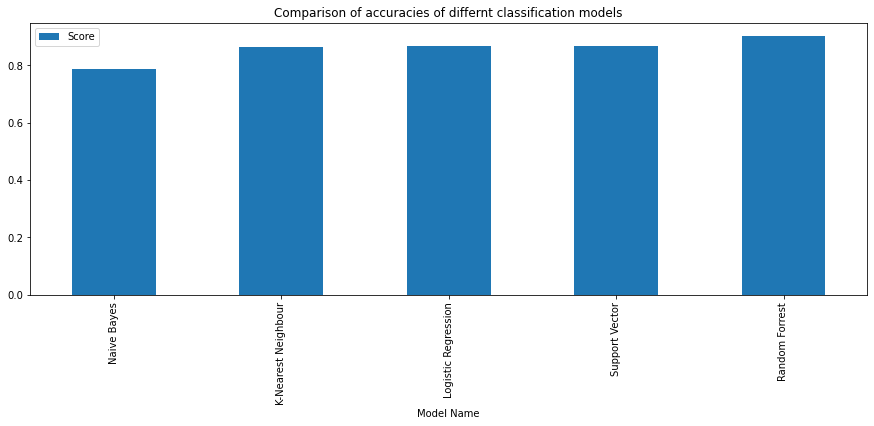

In [27]:
pd.DataFrame({'Model Name' : modelNames,'Score' : score}).sort_values(by='Score', ascending=True).plot(x=0, y=1, kind='bar', figsize=(15,5), title='Comparison of accuracies of differnt classification models')
plt.show()